In [126]:
import pandas as pd
import numpy as np


In [127]:
# generate in nicer format
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# for graphs printing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 100

In [128]:
# read the titanic data
data = pd.read_csv('titanic.csv')

In [129]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [130]:
# Clean the data from irrelevant columns that will not help analyse the data
data = data.drop(['ticket','cabin','home.dest','body','name','boat'], axis=1)


In [131]:

data[:20]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
5,1,1,male,48.0000,0,0,26.5500,S
6,1,1,female,63.0000,1,0,77.9583,S
7,1,0,male,39.0000,0,0,0.0000,S
8,1,1,female,53.0000,2,0,51.4792,S
9,1,0,male,71.0000,0,0,49.5042,C


In [132]:
data.isnull().values.any()


True

In [133]:
# drop NaN lines
data = data.dropna()
data

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
5,1,1,male,48.0000,0,0,26.5500,S
6,1,1,female,63.0000,1,0,77.9583,S
7,1,0,male,39.0000,0,0,0.0000,S
8,1,1,female,53.0000,2,0,51.4792,S
9,1,0,male,71.0000,0,0,49.5042,C


In [134]:
data.isnull().values.any()


False

In [135]:
data.age



0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
5       48.0000
6       63.0000
7       39.0000
8       53.0000
9       71.0000
10      47.0000
11      18.0000
12      24.0000
13      26.0000
14      80.0000
16      24.0000
17      50.0000
18      32.0000
19      36.0000
20      37.0000
21      47.0000
22      26.0000
23      42.0000
24      29.0000
25      25.0000
26      25.0000
27      19.0000
28      35.0000
29      28.0000
30      45.0000
31      40.0000
32      30.0000
33      58.0000
34      42.0000
35      45.0000
36      22.0000
38      41.0000
39      48.0000
41      44.0000
42      59.0000
43      60.0000
44      41.0000
45      45.0000
47      42.0000
48      53.0000
49      36.0000
50      58.0000
51      33.0000
52      28.0000
53      17.0000
         ...   
1237    24.0000
1238    25.0000
1239    34.0000
1240     0.4167
1244    16.0000
1248    32.0000
1251    30.5000
1252    44.0000
1254    25.0000
1256     7.0000
1257     9.0000
1258    

In [136]:
data.age.mean()


29.813199137104508

In [137]:
data.age.value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
25.0000    34
28.0000    32
36.0000    31
27.0000    30
29.0000    30
26.0000    30
19.0000    29
23.0000    26
32.0000    24
20.0000    23
35.0000    23
31.0000    23
45.0000    21
33.0000    21
17.0000    20
39.0000    20
16.0000    19
40.0000    18
42.0000    18
34.0000    16
50.0000    15
48.0000    14
47.0000    14
38.0000    13
2.0000     12
41.0000    11
1.0000     10
54.0000    10
9.0000     10
44.0000    10
4.0000     10
37.0000     9
49.0000     9
43.0000     9
55.0000     8
14.0000     8
51.0000     8
3.0000      7
60.0000     7
15.0000     6
46.0000     6
6.0000      6
8.0000      6
58.0000     6
52.0000     6
64.0000     5
13.0000     5
61.0000     5
57.0000     5
5.0000      5
7.0000      4
10.0000     4
56.0000     4
63.0000     4
62.0000     4
53.0000     4
32.5000     4
11.0000     4
65.0000     3
0.7500      3
59.0000     3
40.5000     3
18.5000     3
0.8333      3
12.0000     3
28.5000     3
45.500

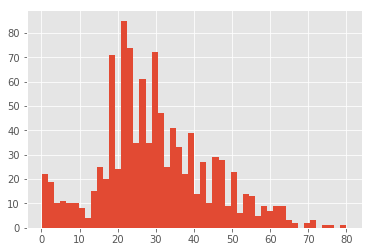

In [138]:
data.age.hist(bins=50)

In [139]:
data[:40]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
5,1,1,male,48.0000,0,0,26.5500,S
6,1,1,female,63.0000,1,0,77.9583,S
7,1,0,male,39.0000,0,0,0.0000,S
8,1,1,female,53.0000,2,0,51.4792,S
9,1,0,male,71.0000,0,0,49.5042,C


In [140]:
data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [141]:
data.count()

pclass      1043
survived    1043
sex         1043
age         1043
sibsp       1043
parch       1043
fare        1043
embarked    1043
dtype: int64

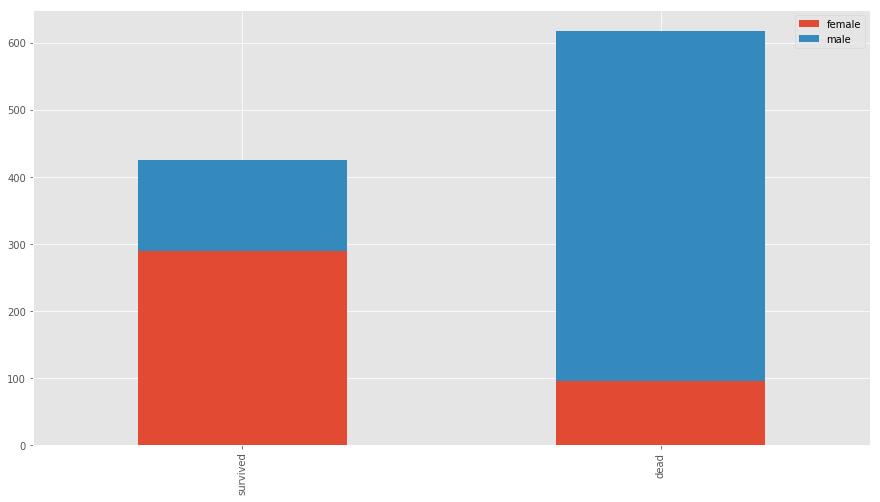

In [142]:
# survival by sex
survived_sex = data[data['survived']==1]['sex'].value_counts()
dead_sex = data[data['survived']==0]['sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['survived','dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))
# graph shows that female has better chance to survive

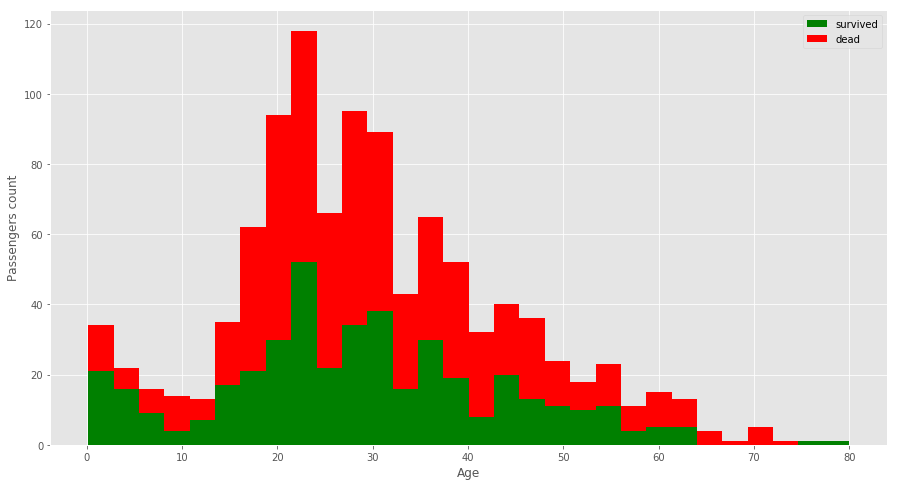

In [143]:
# check correlation between the survival and the age variable.
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['survived']==1]['age'],data[data['survived']==0]['age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['survived','dead'])
plt.xlabel('Age')
plt.ylabel('Passengers count')
plt.legend()

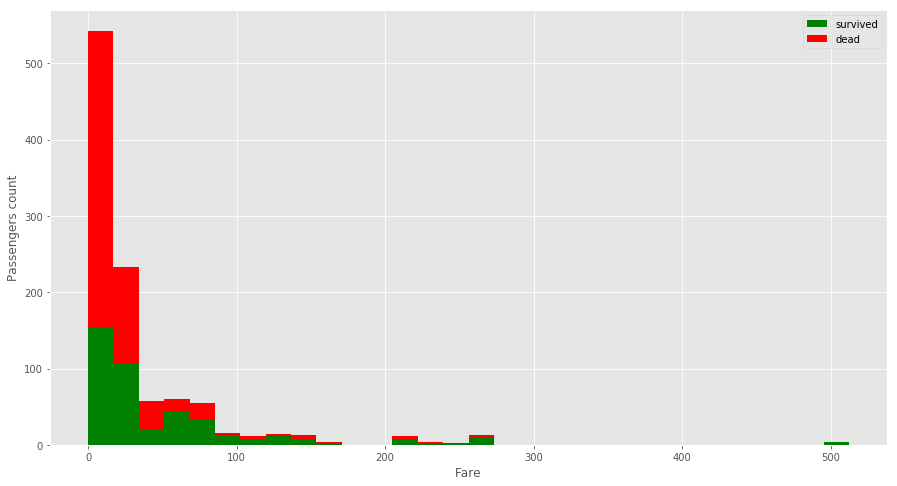

In [144]:
# ticket fare correlated with the survival.
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['survived']==1]['fare'],data[data['survived']==0]['fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['survived','dead'])
plt.xlabel('Fare')
plt.ylabel('Passengers count')
plt.legend()

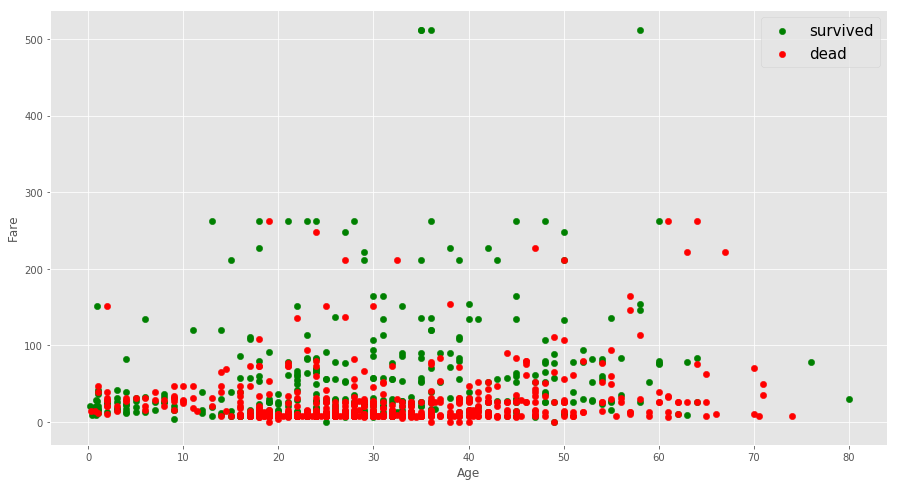

In [145]:
# Scatter graph of the age, the fare and the survival.
plt.figure(figsize=(15,8))
sg = plt.subplot()
sg.scatter(data[data['survived']==1]['age'],data[data['survived']==1]['fare'],c='green',s=40)
sg.scatter(data[data['survived']==0]['age'],data[data['survived']==0]['fare'],c='red',s=40)
sg.set_xlabel('Age')
sg.set_ylabel('Fare')
sg.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)
# Indeed who ever paid more had better chance to survive....

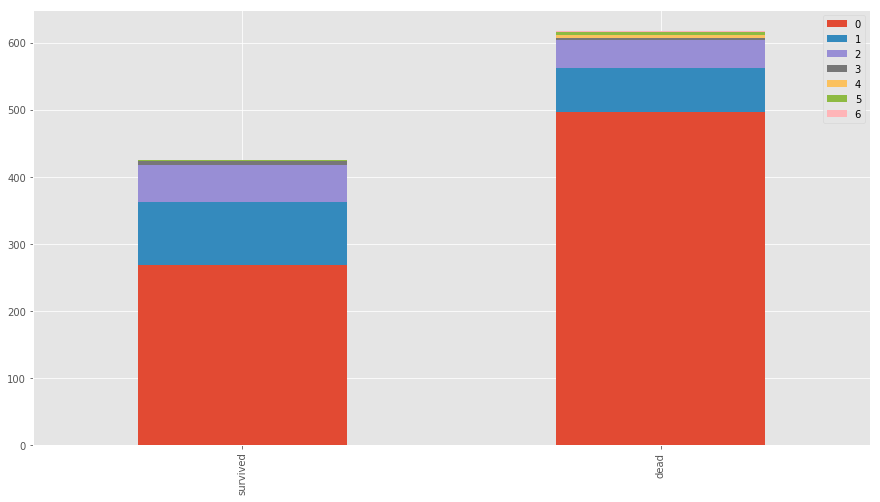

In [146]:
# correlation of parch and the survival.
survived_pclass = data[data['survived']==1]['parch'].value_counts()
dead_pclass = data[data['survived']==0]['parch'].value_counts()
df = pd.DataFrame([survived_pclass,dead_pclass])
df.index = ['survived','dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

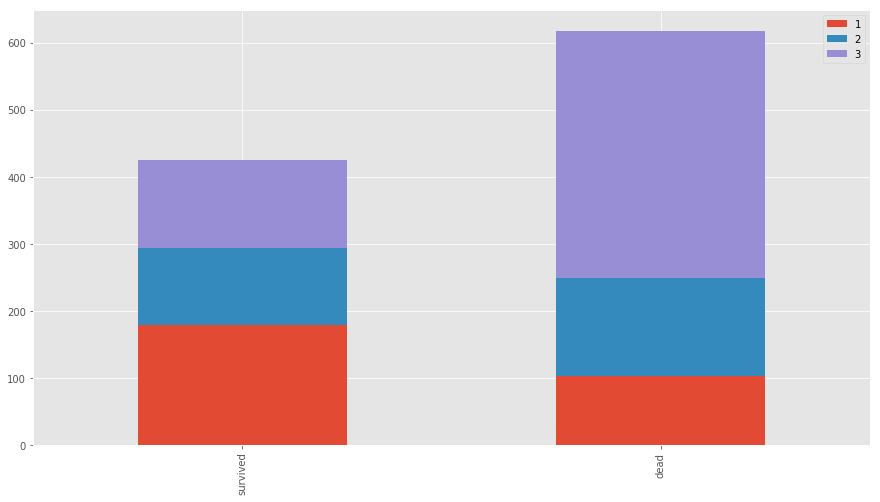

In [147]:
# pclass and the survival.
survived_pclass = data[data['survived']==1]['pclass'].value_counts()
dead_pclass = data[data['survived']==0]['pclass'].value_counts()
df = pd.DataFrame([survived_pclass,dead_pclass])
df.index = ['survived','dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))
# graph indeed shows that there were more survivals in 1st class

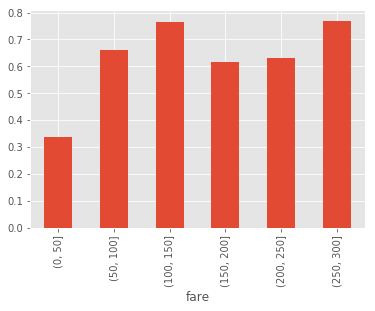

In [148]:
# is fare ticket indicator for survival
group_by_fare = pd.cut(data["fare"], np.arange(0, 350, 50))
fare_grouping = data.groupby(group_by_fare).mean()
fare_grouping['survived'].plot.bar()
# looking for fare ticket netween 50 till 150 ,there is correlation in fare ticket for the highest survival

In [149]:
sex = np.zeros(len(data))
sex[data['sex']== 'male'] = 1
sex[data['sex']== 'female'] = 0
data['sex'] = sex

In [150]:
embarked = np.zeros(len(data))
embarked[data['embarked']== 'S'] = 3
embarked[data['embarked']== 'C'] = 2
embarked[data['embarked']== 'Q'] = 1
data['embarked'] = embarked

In [190]:
# training and predicting
np.random.seed(123)
# Create and fit a nearest-neighbor classifier 
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier(2) 

In [191]:
target =  data['survived']

In [192]:
data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [193]:
# preparing data for testing and predicting 
data_x =  data.drop(['survived'], axis=1)


In [194]:
#train on the first 900
knn.fit(data_x[:900], target[:900]) 
#test on the rest
knn.score(data_x[900:], target[900:]) 

0.67132867132867136

In [189]:
from sklearn import svm 
svc = svm.SVC(kernel='linear') 
svc.fit(data_x[900:], target[900:]) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [172]:
svc.score(data_x[900:], target[900:]) 

0.79720279720279719

In [173]:
# polynomial kernel
svc = svm.SVC(kernel='poly', degree=1)  # degree: polynomial degree
svc.fit(data_x[900:], target[900:])
svc.score(data_x[900:], target[900:]) 


0.79720279720279719

In [174]:
# RBF kernel (Radial Basis Function)
# 900 gave better prediction
svc = svm.SVC(kernel='rbf')  # gamma: inverse of size of radial kernel
svc.fit(data_x[900:], target[900:])
svc.score(data_x[900:], target[900:]) 

0.85314685314685312

In [73]:
# The best prediction score is 0.85 
